# **Exploratory Data Analysis**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.0/319.0 kB 10.9 MB/s eta 0:00:00


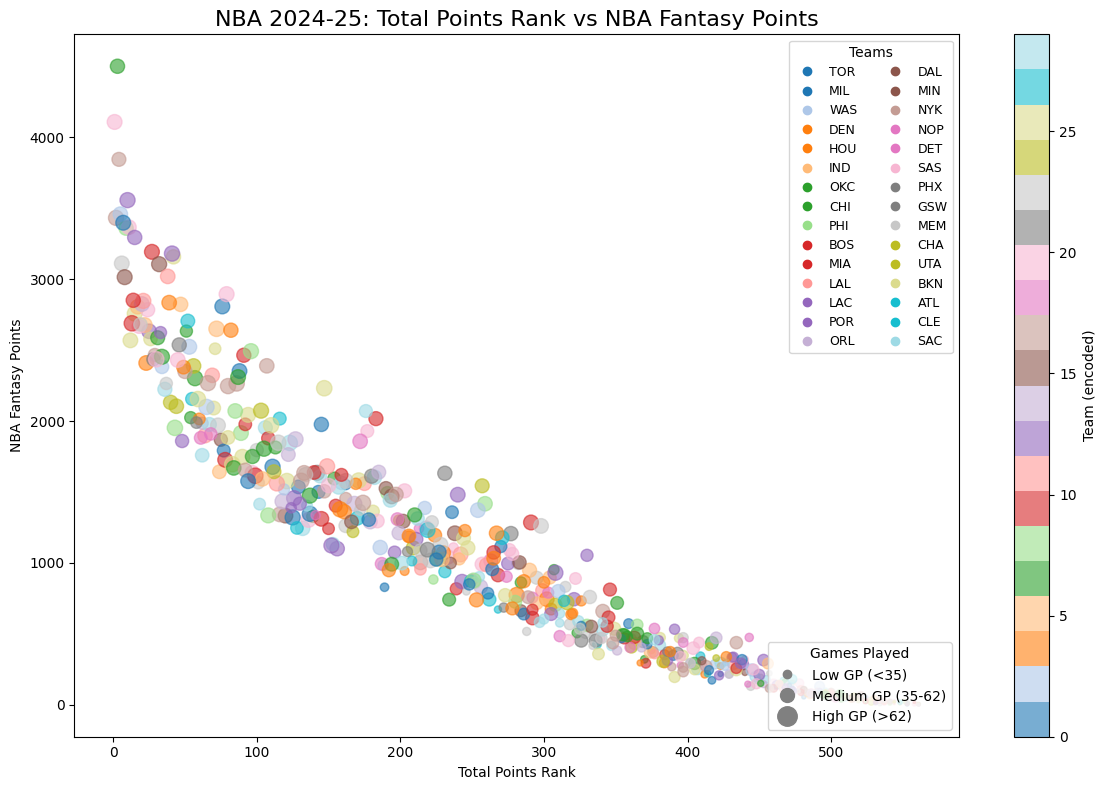

In [1]:
!pip install nba_api

import matplotlib.pyplot as plt
import seaborn as sns
from nba_api.stats.endpoints import leaguedashplayerstats
import matplotlib.lines as mlines
import numpy as np


# Load player stats for 2024-25 season
data = leaguedashplayerstats.LeagueDashPlayerStats(season='2024-25').get_data_frames()[0]
data = data[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'NBA_FANTASY_PTS', 'PTS_RANK', 'GP']].dropna()

plt.figure(figsize=(12, 8))

# --- Plot setup ---
team_codes = data['TEAM_ABBREVIATION'].astype('category').cat.codes
scatter = plt.scatter(
    data['PTS_RANK'], data['NBA_FANTASY_PTS'],
    c=team_codes,
    s=data['GP'] * 1.5,     # Scale for visibility on chart only
    alpha=0.6, cmap='tab20'
)

plt.title('NBA 2024-25: Total Points Rank vs NBA Fantasy Points', fontsize=16)
plt.xlabel('Total Points Rank')
plt.ylabel('NBA Fantasy Points')

# --- Colorbar (encoded teams) ---
plt.colorbar(scatter, label='Team (encoded)')

# --- Games Played Legend (fixed, visually balanced sizes) ---
gp_percentiles = np.percentile(data['GP'], [33, 66])
size_labels = [
    f'Low GP (<{gp_percentiles[0]:.0f})',
    f'Medium GP ({gp_percentiles[0]:.0f}-{gp_percentiles[1]:.0f})',
    f'High GP (>{gp_percentiles[1]:.0f})'
]
# Use fixed, small marker sizes (in pts)
legend_marker_sizes = [6, 10, 14]

size_handles = [
    mlines.Line2D([], [], marker='o', color='gray', linestyle='',
                  markersize=size, label=label)
    for size, label in zip(legend_marker_sizes, size_labels)
]

# --- Team Legend (optional: limit number of teams shown) ---
team_names = data['TEAM_ABBREVIATION'].unique()
team_colors = [plt.cm.tab20(i / len(team_names)) for i in range(len(team_names))]
team_handles = [
    mlines.Line2D([], [], marker='o', color=color, linestyle='',
                  markersize=6, label=team)
    for team, color in zip(team_names, team_colors)
]

# --- Combine Legends ---
first_legend = plt.legend(handles=team_handles, title="Teams", loc="upper right", fontsize=9, ncol=2)
plt.gca().add_artist(first_legend)
plt.legend(handles=size_handles, title="Games Played", loc="lower right", fontsize=10)

plt.tight_layout()
plt.show()

In [2]:
# Data set needed uploaded
data = leaguedashplayerstats.LeagueDashPlayerStats(season='2024-25').get_data_frames()[0]
data.columns


Index(['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'WNBA_FANTASY_PTS', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
       'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
       'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
       'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
       'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
       'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK', 'TEAM_COUNT'],
      dtype='object')

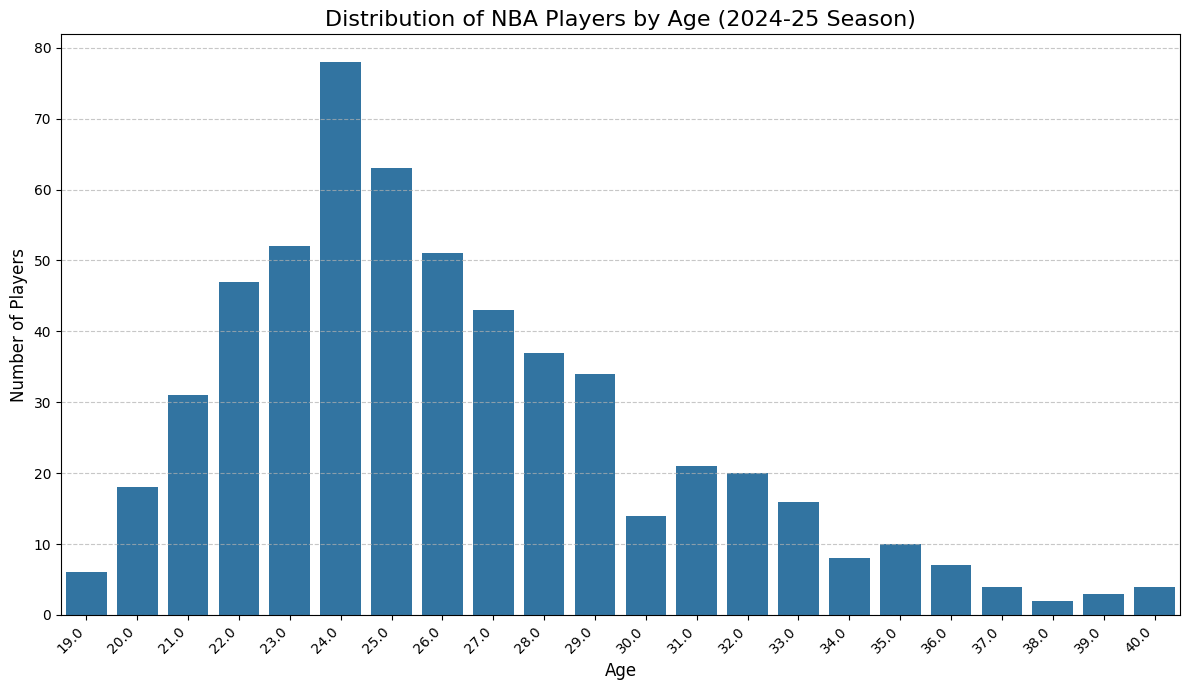

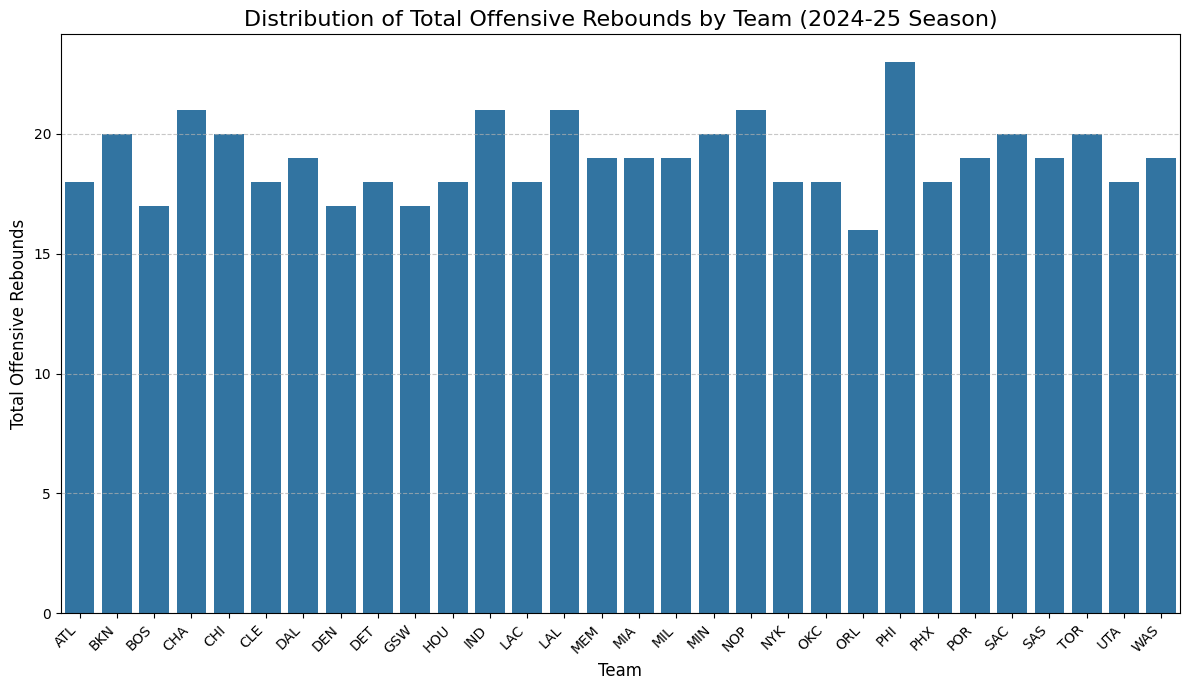

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by AGE and count players within each category
age_distribution = data.groupby('AGE')['PLAYER_NAME'].count().reset_index()
age_distribution.columns = ['Age', 'Number of Players']

# Create the bar chart to analyze age distribution
plt.figure(figsize=(12, 7))
sns.barplot(x='Age', y='Number of Players', data=age_distribution)
plt.title('Distribution of NBA Players by Age (2024-25 Season)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Group data by Team and count Offensive rebounds within each category
position_distribution = data.groupby('TEAM_ABBREVIATION')['OREB'].count().reset_index()
position_distribution.columns = ['Total Offensive Rebounds', 'Team']
#Graphing Barplot to analyze Offensive Rebounds
plt.figure(figsize=(12, 7))
sns.barplot(x='Total Offensive Rebounds', y='Team', data=position_distribution)
plt.title('Distribution of Total Offensive Rebounds by Team (2024-25 Season)', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Total Offensive Rebounds', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **Random Forest Vanilla Model**

Mean Squared Error: 18466.5920
R² (Coefficient of Determination): 0.9735


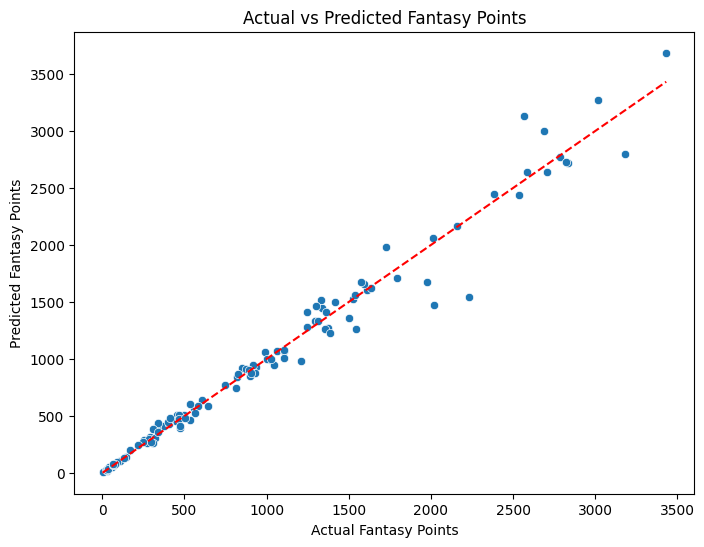

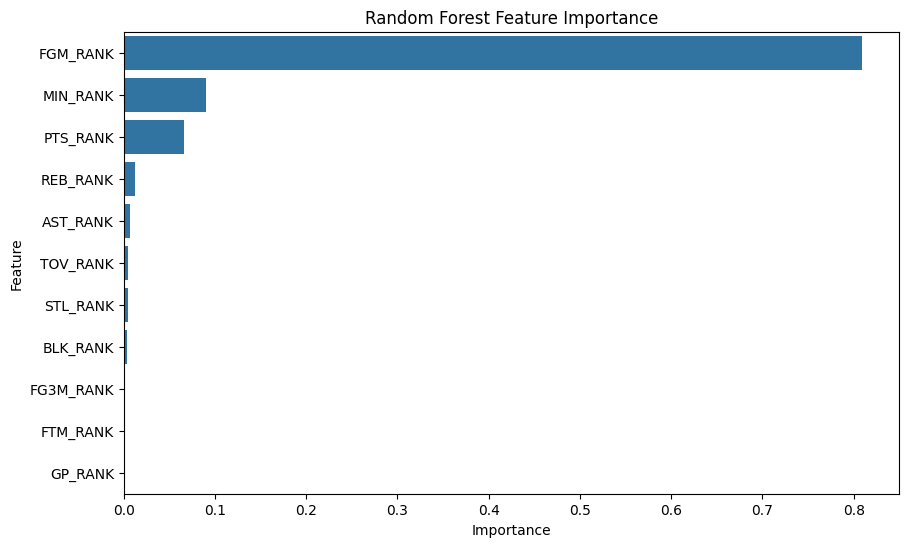

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#Defining Features to be examined within RandomForest
feature_columns =  [
    'PTS_RANK', 'REB_RANK', 'AST_RANK', 'STL_RANK', 'BLK_RANK', 'TOV_RANK',
    'GP_RANK', 'MIN_RANK', 'FGM_RANK', 'FG3M_RANK', 'FTM_RANK'
]

#Defining X (Features) and y (Target)
X = data[feature_columns]
y = data['NBA_FANTASY_PTS']

 #Splitting the dataset into training and test set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initializing the RandomForestRegressor model with 100 trees and random seed
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) #Fit model on training data

#Predicitinf target for test data
y_pred = rf_model.predict(X_test)

#Calculating Mean Squared Error for model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

#Calculate R^2 for evaluation of model explanatory power
r2 = r2_score(y_test, y_pred)
print(f"R² (Coefficient of Determination): {r2:.4f}")

#Plotting actual and predicted fantasy points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Fantasy Points')
plt.xlabel('Actual Fantasy Points')
plt.ylabel('Predicted Fantasy Points')
plt.show()

#Get feature importances from RF Model
feature_importances = rf_model.feature_importances_
#Creating DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False) #sort in descending order

#Plot feature importance as barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()


# **Random Forest Tuned Model**

In [ ]:
#Create a parameter grid for gridsearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
print("Defined hyperparameter grid:")
print(param_grid)

Defined hyperparameter grid:
{'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
from sklearn.model_selection import GridSearchCV

#Initializing random forest model with random seed
rf_model_grid = RandomForestRegressor(random_state=42)

#Defining parameter grid for grid search
grid_search = GridSearchCV(
    estimator=rf_model_grid,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

#Fitting the GridSearchCV object to the training data for he best model parameters
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

Best parameters found: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score (negative MSE): -19124.492664318695


In [ ]:
#Extract best parameters for grid search
best_params = grid_search.best_params_
# Initializing a new RandomForestRegressor using the optimal hyperparameters
tuned_rf_model = RandomForestRegressor(random_state=42, **best_params)
# Training (fitting) the tuned Random Forest model on the training data
tuned_rf_model.fit(X_train, y_train)
print("Tuned Random Forest model trained successfully with best parameters:")
print(best_params)

Tuned Random Forest model trained successfully with best parameters:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Tuned Model - Mean Squared Error: 18466.5920
Tuned Model - R² (Coefficient of Determination): 0.9735


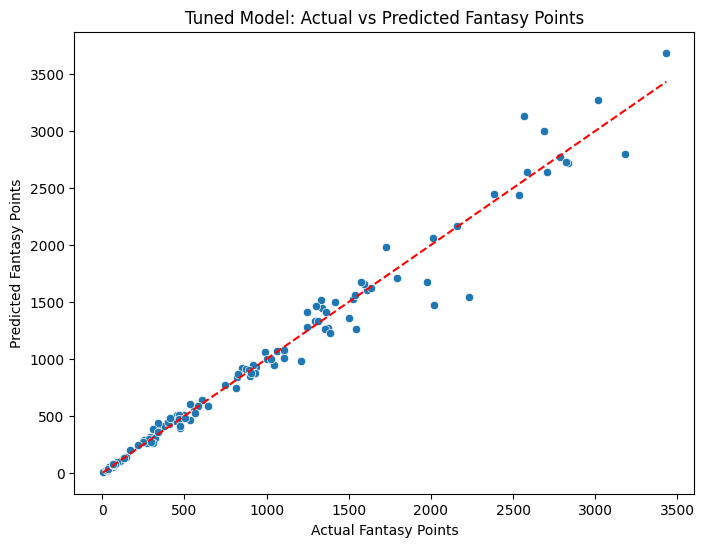

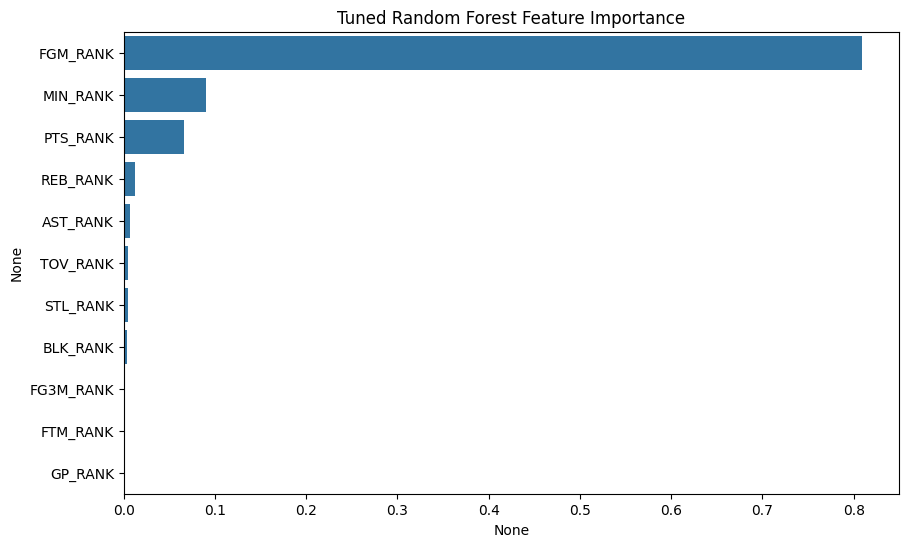

In [ ]:
#Predicting fantasy points on the test set using tuned RF
y_pred_tuned = tuned_rf_model.predict(X_test)

#Calculating Mean Squared Error for tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
#Calculating R^2 for tuned model
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Model - Mean Squared Error: {mse_tuned:.4f}")
print(f"Tuned Model - R\u00b2 (Coefficient of Determination): {r2_tuned:.4f}")

# Plotting Actual vs Predicted Fantasy Points for the tuned model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_tuned)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Tuned Model: Actual vs Predicted Fantasy Points')
plt.xlabel('Actual Fantasy Points')
plt.ylabel('Predicted Fantasy Points')
plt.show()

# Extracting feature importance values from the tuned model
feature_imp = pd.Series(tuned_rf_model.feature_importances_, index=feature_columns).sort_values(ascending=False)
# Plotting Feature Importance for the tuned Random Forest model
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Tuned Random Forest Feature Importance')
plt.show()